In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import style
style.use('ggplot')

In [3]:
df = pd.read_csv('DATASETS/TSLA.csv',parse_dates=True,index_col='Date')

In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-30,201.300003,217.537994,200.746002,215.962006,215.962006,84592500
2020-07-01,216.600006,227.065994,216.100006,223.925995,223.925995,66634500
2020-07-02,244.296005,245.600006,237.119995,241.731995,241.731995,86250500
2020-07-06,255.337997,275.558014,253.207993,274.316010,274.316010,102849500
2020-07-07,281.002014,285.899994,267.342010,277.971985,277.971985,107448500
...,...,...,...,...,...,...
2021-06-23,632.000000,657.200012,630.039978,656.570007,656.570007,31099200
2021-06-24,674.989990,697.619995,667.609985,679.820007,679.820007,45982400
2021-06-25,689.580017,693.809998,668.700012,671.869995,671.869995,32429000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-06-30 to 2021-06-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


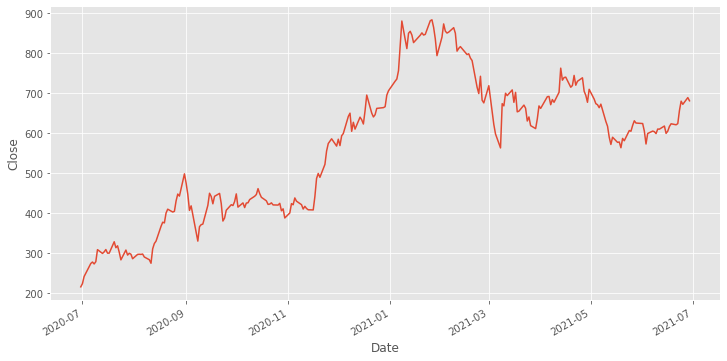

In [6]:
plt.figure(figsize=(12,6))
plt.grid(True)
df['Close'].plot()
plt.ylabel('Close')
plt.show()

In [7]:
train_data = df["Close"].iloc[:222]

In [8]:
test_data = df["Close"].iloc[222:]

In [9]:
len(train_data)

222

In [10]:
len(test_data)

30

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
dftest = adfuller(df['Close'],autolag='AIC')

In [13]:
dftestoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-value','Lags Used','Number of Observation Used'])

In [14]:
dftestoutput

Test Statistics                -1.938439
p-value                         0.314200
Lags Used                       0.000000
Number of Observation Used    251.000000
dtype: float64

In [15]:
from pandas.plotting import autocorrelation_plot

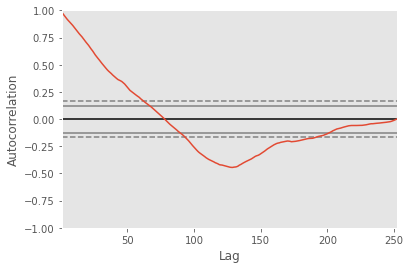

In [16]:
plt.figure()
autocorrelation_plot(df['Close'])
plt.show()

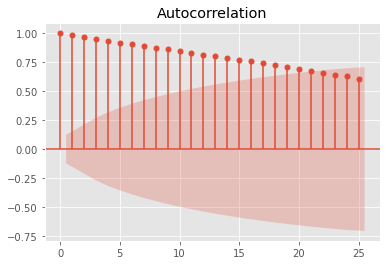

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Close'])
plt.show()

In [18]:
import pmdarima

In [19]:
import statsmodels.api as sm
from pmdarima import auto_arima

In [22]:
stepwise_model = auto_arima(train_data, start_p=1, start_q=1,

                   max_p=7, max_q=7, seasonal=True, start_P=1, start_Q=1, max_P=7, max_D=7, max_Q=7, 

                   d=None, D=None, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2053.765, Time=8.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2051.513, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2051.851, Time=0.60 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2051.774, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2050.464, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 16.074 seconds


In [23]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  222
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1024.232
Date:                Wed, 30 Jun 2021   AIC                           2050.464
Time:                        18:43:11   BIC                           2053.862
Sample:                             0   HQIC                          2051.836
                                - 222                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       620.9194     42.112     14.744      0.000     538.381     703.458
===================================================================================
Ljung-Box (L1) (Q):                   1.68   Jarque-Bera (JB):                34.53
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               1.73   Skew:                             0.09
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
forecast,conf_int = stepwise_model.predict(n_periods=30,return_conf_int=True)

forecast = pd.DataFrame(forecast,columns=['close_pred'])

In [25]:
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])

df_conf.index = test_data.index

In [26]:
forecast.index = test_data.index

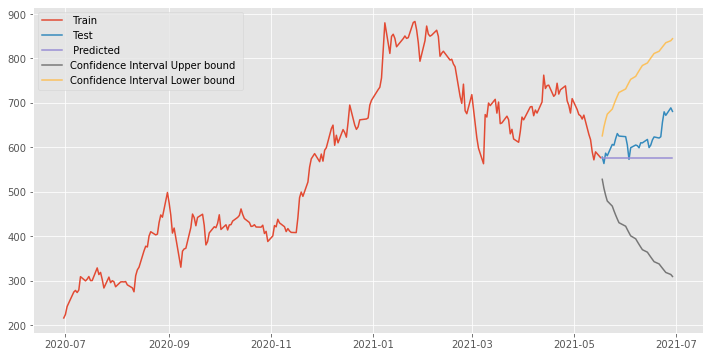

In [27]:
plt.figure(figsize=(12,6))

plt.plot( train_data, label=' Train ')

plt.plot(test_data, label=' Test ')

plt.plot(forecast, label=' Predicted ')

plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')

plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')

plt.legend(loc='best')

plt.show()

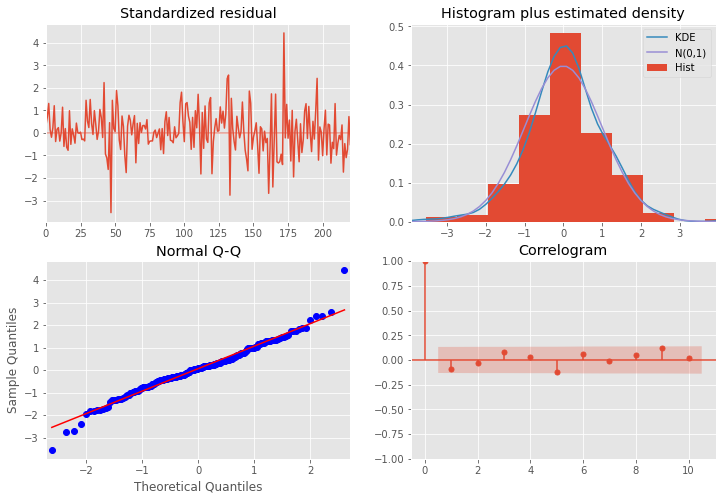

In [28]:
stepwise_model.plot_diagnostics(figsize=(12,8));